Import libraries

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Import data

In [56]:
df = pd.read_csv("expenses.txt", sep=",", header=0)
df

,date,home,shopping,trips,payments,health & beauty,transport,leisure
0,2024-04,724.21,310.78,271.8,143.50,69.00,59.98,52.20
1,2024-03,762.41,359.88,0.0,361.00,118.28,54.40,155.10
2,2024-02,1410.00,297.46,0.0,91.69,119.68,45.40,65.23


Sum of trimester expenses

In [57]:
trm = df.iloc[:, 1:-1].sum()
trm

 home               2896.62
 shopping            968.12
 trips               271.80
 payments            596.19
 health & beauty     306.96
 transport           159.78
dtype: float64

Sum of all monthly expenses

In [58]:
monthly = df.transpose()
monthly.columns = monthly.iloc[0]
sum_array = monthly.iloc[1:-1].sum()
sumatory = pd.DataFrame(data=sum_array)
convertido = sumatory.reset_index()
convertido.columns = ["date", "sum"]

Percentage calculation

In [59]:
df["sum"] = convertido["sum"]
df

,date,home,shopping,trips,payments,health & beauty,transport,leisure,sum
0,2024-04,724.21,310.78,271.8,143.50,69.00,59.98,52.20,1579.27
1,2024-03,762.41,359.88,0.0,361.00,118.28,54.40,155.10,1655.97
2,2024-02,1410.00,297.46,0.0,91.69,119.68,45.40,65.23,1964.23


In [60]:
resultado = df.iloc[:,1:].div(df["sum"], axis=0)
resultado


,home,shopping,trips,payments,health & beauty,transport,leisure,sum
0,0.458573,0.196787,0.172105,0.090865,0.043691,0.03798,0.033053,1.0
1,0.460401,0.217323,0.0,0.217999,0.071426,0.032851,0.093661,1.0
2,0.717839,0.151438,0.0,0.04668,0.06093,0.023113,0.033209,1.0


In [61]:
prctg = resultado.mul(100)
prctg 

,home,shopping,trips,payments,health & beauty,transport,leisure,sum
0,45.857263,19.678712,17.210483,9.086477,4.369107,3.797957,3.305325,100.0
1,46.040085,21.732278,0.0,21.799912,7.142641,3.285084,9.366112,100.0
2,71.783854,15.143848,0.0,4.667987,6.092973,2.311338,3.320894,100.0


In [62]:
redondeado = pd.DataFrame(data = prctg, dtype=float)
for column in redondeado:
    if column !='sum':
        redondeado[column] = redondeado[column].round(2)
redondeado

,home,shopping,trips,payments,health & beauty,transport,leisure,sum
0,45.86,19.68,17.21,9.09,4.37,3.80,3.31,100.0
1,46.04,21.73,0.00,21.80,7.14,3.29,9.37,100.0
2,71.78,15.14,0.00,4.67,6.09,2.31,3.32,100.0


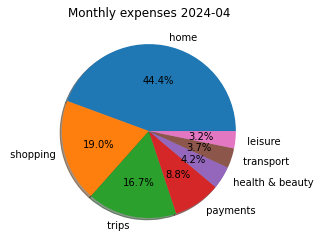

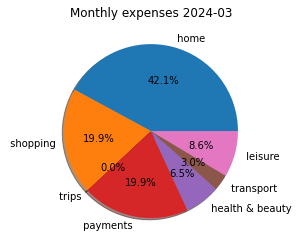

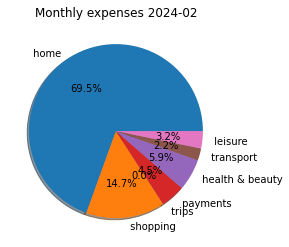

In [63]:
data = redondeado.iloc[:,0:-1]
for index, row in data.iterrows():
    labels = list(row.index)  # Obtener los nombres de las columnas como etiquetas
    slices = list(row.values)  # Obtener los valores de la fila como porciones
    fig, ax = plt.subplots()
    ax.pie(slices, labels=labels, autopct='%1.1f%%', shadow=True)
    ax.set_title(f'Monthly expenses {df["date"][index]}')
    plt.show()